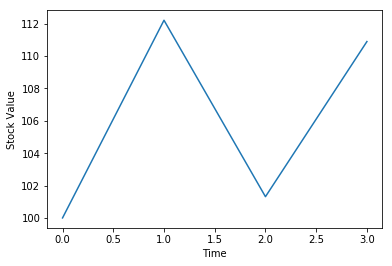

array([  3.80507014,   1.40165088,   3.59444892,   5.50000796,
         5.25053086,  11.72073535,   1.6689612 ,  17.68131931,
         0.87114749,  10.95979612,   9.66785283,  14.37402234,
         7.31715884,   1.41740498,   3.32916818,   2.23107267,
         2.14115289,  14.14162123,   1.0210975 ,   5.53782016,
         1.2720506 ,   0.86580428,  32.75964697,  27.43600092,
         3.98307062,  22.63809063,   3.65533456,   1.00140504,
         0.94060242,   1.27442079,   7.3007436 ,   1.42271638,
         1.68156017,   0.88578027,   3.69123008,   3.09739981,
         1.47469075,   5.02364025,   8.22609418,   2.70468333,
         6.34921004,   0.88279467,  16.10085801,   1.89582327,
         4.93079443,   1.15351105,   2.72363681,   2.28585226,
         1.83260109,   2.73779668,  26.56314886,  32.07186692,
         1.5395035 ,  15.67688408,   1.05262017,   2.51763928,
         0.91769456,  61.97258494,   1.33593199,   1.04573663,
         8.19481233,   5.21893916,   2.47385832,   4.38

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', np.RankWarning)

N = 100
M=4
S_0=100
r=0.1
q=0.0
sigma=0.25
T=1.0
Strike =100
S=np.zeros((N,M))
np.random.seed(1)
W=np.random.randn(N,M-1)
dt=T/float(M)
sq_dt=np.sqrt(dt)

drift =(r-0.5*sigma*sigma)*dt
diffusion = sigma*sq_dt

ln_S=np.zeros((N,M))
ln_S[:,0]=np.log(S_0)
for t in range(1,M):
    ln_S[:,t]=ln_S[:,t-1] + drift + diffusion * W[:,t-1]
S=np.exp(ln_S)
#Plotting a sample trajectory to check our s@#t
plt.plot(S[N-1,:])
plt.ylabel("Stock Value")
plt.xlabel("Time")
plt.show()

FV_vec=np.zeros((N))
FV_vec = np.maximum(Strike-S[:,M-1],0)
fairValue = np.average(FV_vec) * np.exp(-r*T)
fairValue
S

CashFlowMatrix = np.zeros((N,M))
CashFlowMatrix[:,M-1]=FV_vec
CashFlowMatrix[:,M-2]=np.maximum(Strike-S[:,M-2],0)
discountFactor = np.exp(-r*dt)
CashFlowMatrix
Y=[]
X=[]
for i in range(0,N-1):
    if(CashFlowMatrix[i,M-2]>0.0):
            Y.append(CashFlowMatrix[i,M-1]*discountFactor)
            X.append(S[i,M-2])
        
Z=np.polyfit(X,Y,2)
p = np.poly1d(Z)
np.maximum(p(S[:,M-2]),CashFlowMatrix[:,M-2])
#now, we regress Y with const, X, X^2 to have E[X cond Y]
#then, we compare CashFlowMatrix[:,M-2]versus E[X cond Y], CashFlowMatrix=np.maximum(CashFlowMatrix[:,M-2],E[X cond Y])
#We need to make sure, if it worths to exercise the option, then the value is zero at the next step...

In [7]:
import math as math
def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + math.erf(x / np.sqrt(2.0))) / 2.0
def BlackScholes(S,
                 T,
                 K,
                 r,
                 q,
                 sigma,
                 isCall):
    d1=(np.log(S/K)+T*(r-q+0.5*sigma**2))/(sigma*np.sqrt(T))
    d2=d1-np.sqrt(T)*sigma
    if(bool(isCall)):
            return S*phi(d1)- math.exp(-(r)*T)*K*phi(d2)
    else:
        return math.exp(-r*T)*K*phi(-d2)-S*phi(-d1) 
x=BlackScholes(S_0,T,Strike,r,q,sigma,0)
print x

5.45953258191
